## section2

### click_waveform

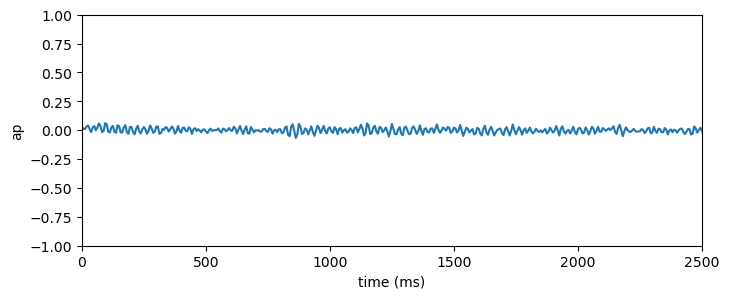

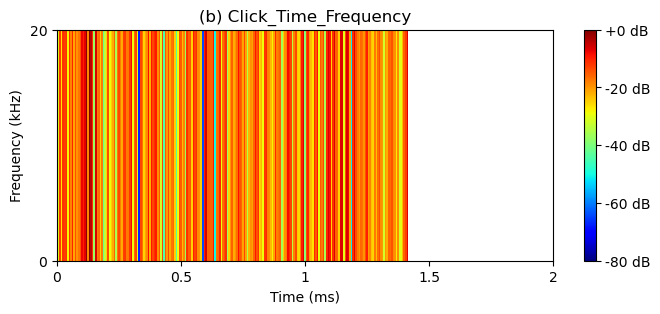

In [12]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
click_path = "/Users/baijingyuan/jupyterPj/reproducibility/data/click.wav"
waveform, sr = librosa.load(click_path, sr = None)
time = librosa.times_like(waveform, sr=sr) * 1000  # 时间转换为毫秒

# 绘制波形图
plt.figure(figsize=(8, 3))
plt.plot(time, waveform)
plt.xlabel('time (ms)')
plt.ylabel('ap')
plt.xlim(0, 2500)  # 调整显示的时间范围
plt.ylim(-1, 1)  # 根据幅度范围调整
plt.show()


click_path = "/Users/baijingyuan/jupyterPj/reproducibility/data/click.wav"
y, sr = librosa.load(click_path, sr = None)
# 计算短时傅里叶变换 (STFT)
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# 将时间转换为毫秒
times = librosa.times_like(S_db, sr=sr) * 1000  # 时间转换为毫秒
frequencies = librosa.fft_frequencies(sr=sr) / 1000  # 频率转换为 kHz

# 绘制频谱图
plt.figure(figsize=(8, 3))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet', hop_length=512)
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (kHz)')
plt.colorbar(format='%+2.0f dB')
plt.xlim(0, 2)  # 可根据需要调整时间范围
plt.ylim(0, 20)  # 可根据需要调整频率范围
plt.title('(b) Click_Time_Frequency')
plt.show()

### Whistle_waveform

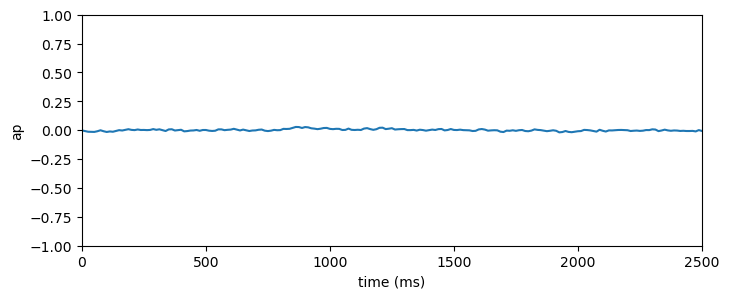

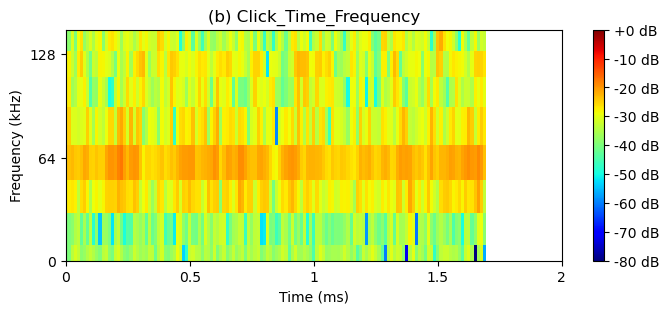

In [29]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
click_path = "/Users/baijingyuan/jupyterPj/reproducibility/data/whistle.wav"
waveform, sr = librosa.load(click_path, sr = None)
time = librosa.times_like(waveform, sr=sr) * 1000  # 时间转换为毫秒

# 绘制波形图
plt.figure(figsize=(8, 3))
plt.plot(time, waveform)
plt.xlabel('time (ms)')
plt.ylabel('ap')
plt.xlim(0, 2500)  # 调整显示的时间范围
plt.ylim(-1, 1)  # 根据幅度范围调整
plt.show()


click_path = "/Users/baijingyuan/jupyterPj/reproducibility/data/whistle.wav"
y, sr = librosa.load(click_path, sr = None)
# 计算短时傅里叶变换 (STFT)
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# 将时间转换为毫秒
times = librosa.times_like(S_db, sr=sr) * 1000  # 时间转换为毫秒
frequencies = librosa.fft_frequencies(sr=sr) / 1000  # 频率转换为 kHz

# 绘制频谱图
plt.figure(figsize=(8, 3))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet', hop_length=512)
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (kHz)')
plt.colorbar(format='%+2.0f dB')
plt.xlim(0, 2)  # 可根据需要调整时间范围
plt.ylim(0, 150)  # 可根据需要调整频率范围
plt.title('(b) Click_Time_Frequency')
plt.show()

### feature_analysis

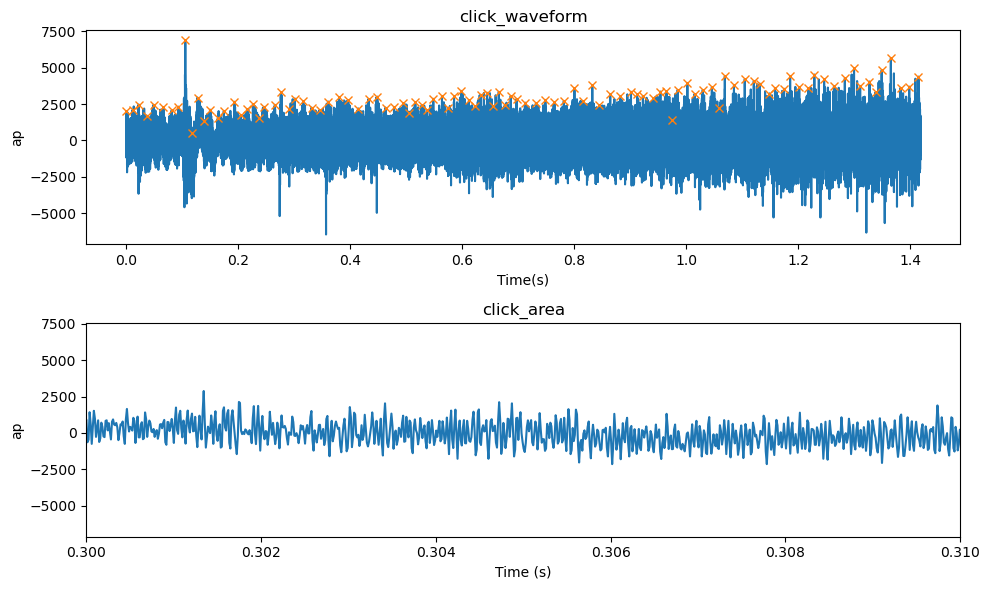

click持续时间： [0.0112548828125, 0.011181640625, 0.01402587890625, 0.012451171875, 0.01724853515625, 0.01505126953125, 0.01197509765625, 0.01229248046875, 0.011083984375, 0.01070556640625, 0.0116943359375, 0.0106201171875, 0.01414794921875, 0.01043701171875, 0.01903076171875, 0.01109619140625, 0.0113525390625, 0.01051025390625, 0.01048583984375, 0.0102294921875, 0.0184326171875, 0.01124267578125, 0.0144775390625, 0.0101318359375, 0.0150634765625, 0.01466064453125, 0.01451416015625, 0.01517333984375, 0.0194091796875, 0.016552734375, 0.017431640625, 0.01861572265625, 0.01573486328125, 0.0146240234375, 0.01514892578125, 0.01614990234375, 0.01009521484375, 0.01134033203125, 0.01162109375, 0.010107421875, 0.0103759765625, 0.015966796875, 0.01063232421875, 0.010888671875, 0.01253662109375, 0.01409912109375, 0.01065673828125, 0.01064453125, 0.0109130859375, 0.0103759765625, 0.01060791015625, 0.0107666015625, 0.010546875, 0.0104736328125, 0.0158203125, 0.01861572265625, 0.0170166015625, 0.01627197

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks

# 读取音频数据
sample_rate, data = wavfile.read('/Users/baijingyuan/jupyterPj/reproducibility/data/click.wav')
time = np.arange(len(data)) / sample_rate

# 找到click的峰值（根据实际情况设置height和distance参数）
peaks, _ = find_peaks(data, height=0.5, distance=sample_rate*0.01)  # 这里0.01s是最小间隔时间，可调节
click_times = time[peaks]

# 计算click持续时间和间隔
click_durations = []
for i in range(len(peaks) - 1):
    start = peaks[i]
    end = peaks[i + 1]
    duration = (end - start) / sample_rate
    click_durations.append(duration)

# 绘制click声音波形及zoomed图
plt.figure(figsize=(10, 6))

# (a) 绘制click声音波形图
plt.subplot(2, 1, 1)
plt.plot(time, data)
plt.plot(time[peaks], data[peaks], "x")
plt.title("click_waveform")
plt.xlabel("Time(s)")
plt.ylabel("ap")

# (b) 缩放特定区域进行详细分析
zoom_start, zoom_end = 0.3, 0.31  # 根据需要调整放大区域
plt.subplot(2, 1, 2)
plt.plot(time, data)
plt.xlim(zoom_start, zoom_end)
plt.title("click_area")
plt.xlabel("Time (s)")
plt.ylabel("ap")

plt.tight_layout()
plt.show()

# 打印click持续时间和间隔
print("click持续时间：", click_durations)
print("相邻click间隔时间：", np.diff(click_times))
